### Mandatory Assignment 1
### Alexander Lerche, Cem Ergin, Juri Rüegger
### KSDAMIN1KU

In [359]:
#importing relevant libraries/packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, linregress

#### Importing data

In [295]:
df = pd.read_json('Assignment1/Dataminers 2024.json')

In [296]:
print(df)

                   Timestamp Enter Your Password  \
0  2024-09-04 10:26:41-03:00        #DAMIN&2024#   
1  2024-09-04 16:18:47-03:00        #DAMIN&2024#   
2  2024-09-05 10:45:03-03:00        #DAMIN&2024#   
3  2024-09-05 15:35:47-03:00        #DAMIN&2024#   
4  2024-09-05 16:40:58-03:00        #DAMIN&2024#   
5  2024-09-06 09:42:16-03:00        #DAMIN&2024#   
6  2024-09-06 10:02:17-03:00        #DAMIN&2024#   
7  2024-09-06 11:13:59-03:00        #DAMIN&2024#   
8  2024-09-06 11:20:37-03:00        #DAMIN&2024#   
9  2024-09-06 11:23:21-03:00        #DAMIN&2024#   
10 2024-09-06 11:24:45-03:00        #DAMIN&2024#   
11 2024-09-06 11:24:48-03:00        #DAMIN&2024#   
12 2024-09-06 11:28:38-03:00        #DAMIN&2024#   
13 2024-09-06 11:31:26-03:00        #DAMIN&2024#   
14 2024-09-06 11:45:29-03:00        #DAMIN&2024#   
15 2024-09-06 11:46:30-03:00        #DAMIN&2024#   
16 2024-09-06 22:37:23-03:00        #DAMIN&2024#   
17 2024-09-07 23:43:20-03:00        #DAMIN&2024#   
18 2024-09-0

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype                    
---  ------                                                    --------------  -----                    
 0   Timestamp                                                 38 non-null     datetime64[ns, UTC-03:00]
 1   Enter Your Password                                       38 non-null     object                   
 2   Your mean shoe size (In the European Continental system)  38 non-null     float64                  
 3   Which program are you studying?                           38 non-null     object                   
 4   Your height (in International inches)                     38 non-null     object                   
 5   Why are you taking this course?                           38 non-null     object                   
 6   How many letters are there in the word "Seattle"?    

In [298]:
print(df.tail())

                   Timestamp Enter Your Password  \
33 2024-09-18 14:33:25-03:00        #DAMIN&2024#   
34 2024-09-18 20:00:18-03:00        #DAMIN&2024#   
35 2024-09-19 20:25:11-03:00        #DAMIN&2024#   
36 2024-09-20 10:35:08-03:00        #DAMIN&2024#   
37 2024-09-20 11:41:14-03:00        #DAMIN&2024#   

    Your mean shoe size (In the European Continental system)  \
33                                               42.0          
34                                               42.0          
35                                               45.0          
36                                               46.0          
37                                               42.0          

                Which program are you studying?  \
33                                MSc Elsewhere   
34                     MSc Software Design, ITU   
35                     MSc Software Design, ITU   
36                     MSc Software Design, ITU   
37  MSc Digitial Innovation and Management, ITU

#### Cleaning Data

In [299]:
df['Your height (in International inches)'] = pd.to_numeric(df['Your height (in International inches)'], errors='coerce')


def convert_to_cm(height):
    if height < 10:  # Heights in feet (e.g., 5.5)
        return height * 30.48
    elif height < 100:  # Heights in inches (e.g., 72.0)
        return height * 2.54
    else:  # Heights already in centimeters (e.g., 180.0)
        return height

# Apply the conversion function to each value in the height column
df['Height in cm'] = df['Your height (in International inches)'].apply(convert_to_cm)

In [300]:
df['Your mean shoe size (In the European Continental system)'] = pd.to_numeric(df['Your mean shoe size (In the European Continental system)'], errors='coerce')

df.loc[df['Your mean shoe size (In the European Continental system)'] < 20, 'Your mean shoe size (In the European Continental system)'] = np.nan

print(df)


                   Timestamp Enter Your Password  \
0  2024-09-04 10:26:41-03:00        #DAMIN&2024#   
1  2024-09-04 16:18:47-03:00        #DAMIN&2024#   
2  2024-09-05 10:45:03-03:00        #DAMIN&2024#   
3  2024-09-05 15:35:47-03:00        #DAMIN&2024#   
4  2024-09-05 16:40:58-03:00        #DAMIN&2024#   
5  2024-09-06 09:42:16-03:00        #DAMIN&2024#   
6  2024-09-06 10:02:17-03:00        #DAMIN&2024#   
7  2024-09-06 11:13:59-03:00        #DAMIN&2024#   
8  2024-09-06 11:20:37-03:00        #DAMIN&2024#   
9  2024-09-06 11:23:21-03:00        #DAMIN&2024#   
10 2024-09-06 11:24:45-03:00        #DAMIN&2024#   
11 2024-09-06 11:24:48-03:00        #DAMIN&2024#   
12 2024-09-06 11:28:38-03:00        #DAMIN&2024#   
13 2024-09-06 11:31:26-03:00        #DAMIN&2024#   
14 2024-09-06 11:45:29-03:00        #DAMIN&2024#   
15 2024-09-06 11:46:30-03:00        #DAMIN&2024#   
16 2024-09-06 22:37:23-03:00        #DAMIN&2024#   
17 2024-09-07 23:43:20-03:00        #DAMIN&2024#   
18 2024-09-0

In [301]:

# Assuming your DataFrame 'df' is already loaded with the data
numberData = ['Height in cm', 'Your mean shoe size (In the European Continental system)']

# Select only the columns with numeric data that you want to impute
df_numeric = df[numberData]

# Convert non-numeric values to NaN
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=2)  # You can adjust the number of neighbors

# Perform KNN imputation
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Replace the original columns with the imputed data
df[numberData] = df_imputed

# Print the updated DataFrame
print(df)


                   Timestamp Enter Your Password  \
0  2024-09-04 10:26:41-03:00        #DAMIN&2024#   
1  2024-09-04 16:18:47-03:00        #DAMIN&2024#   
2  2024-09-05 10:45:03-03:00        #DAMIN&2024#   
3  2024-09-05 15:35:47-03:00        #DAMIN&2024#   
4  2024-09-05 16:40:58-03:00        #DAMIN&2024#   
5  2024-09-06 09:42:16-03:00        #DAMIN&2024#   
6  2024-09-06 10:02:17-03:00        #DAMIN&2024#   
7  2024-09-06 11:13:59-03:00        #DAMIN&2024#   
8  2024-09-06 11:20:37-03:00        #DAMIN&2024#   
9  2024-09-06 11:23:21-03:00        #DAMIN&2024#   
10 2024-09-06 11:24:45-03:00        #DAMIN&2024#   
11 2024-09-06 11:24:48-03:00        #DAMIN&2024#   
12 2024-09-06 11:28:38-03:00        #DAMIN&2024#   
13 2024-09-06 11:31:26-03:00        #DAMIN&2024#   
14 2024-09-06 11:45:29-03:00        #DAMIN&2024#   
15 2024-09-06 11:46:30-03:00        #DAMIN&2024#   
16 2024-09-06 22:37:23-03:00        #DAMIN&2024#   
17 2024-09-07 23:43:20-03:00        #DAMIN&2024#   
18 2024-09-0

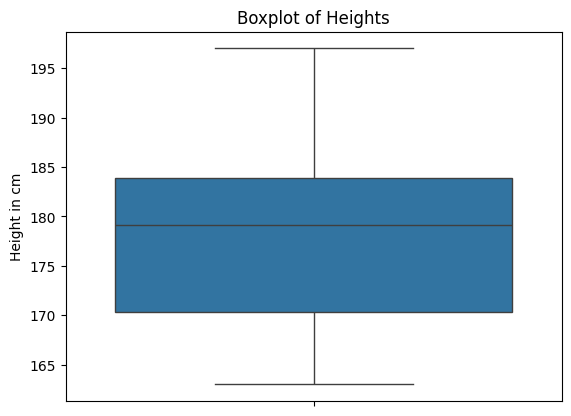

In [302]:
# Assuming 'df' contains the height data converted to cm
sns.boxplot(y=df['Height in cm'])
plt.title('Boxplot of Heights')
plt.show()

In [303]:
# Assuming 'df' is your DataFrame with the 'Height in cm' column
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Height in cm'].quantile(0.25)
Q3 = df['Height in cm'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find rows where the 'Height in cm' column contains outliers
outliers = df[(df['Height in cm'] < lower_bound) | (df['Height in cm'] > upper_bound)]

# Print the outliers
print(df['Height in cm'])
print(outliers)


0     180.000000
1     165.100000
2     193.000000
3     182.880000
4     182.016400
5     184.150000
6     172.897800
7     168.910000
8     196.999860
9     177.800000
10    174.999904
11    180.340000
12    177.800000
13    171.319952
14    184.999884
15    167.640000
16    167.995600
17    163.000000
18    179.999996
19    187.000000
20    181.991000
21    190.500000
22    163.982400
23    170.000000
24    168.000000
25    177.800000
26    165.320000
27    178.231035
28    187.508200
29    190.500000
30    182.499942
31    180.340000
32    167.640000
33    178.000000
34    177.546000
35    187.508200
36    186.000000
37    182.499942
Name: Height in cm, dtype: float64
Empty DataFrame
Columns: [Timestamp, Enter Your Password, Your mean shoe size (In the European Continental system), Which program are you studying?, Your height (in International inches), Why are you taking this course?, How many letters are there in the word "Seattle"?, Height in cm]
Index: []


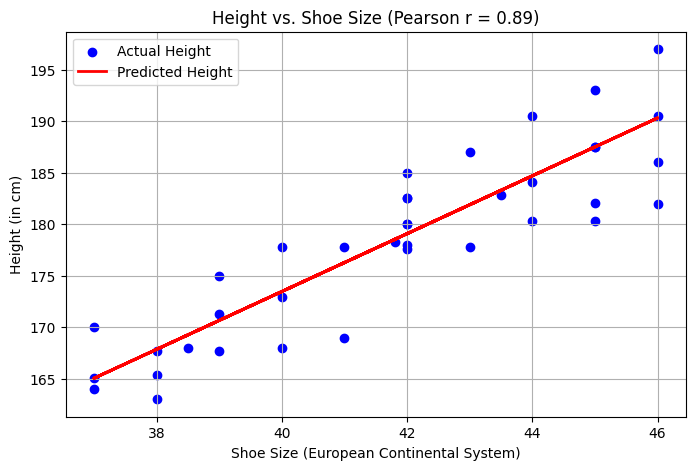

In [363]:
r_value, _ = pearsonr(df['Your mean shoe size (In the European Continental system)'], df['Height in cm'])

# Define x (shoe size) and y (height)
x = df['Your mean shoe size (In the European Continental system)']
y = df['Height in cm']



# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Actual Height')  # Scatter plot of actual data
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Predicted Height')  # Regression line

# Add the Pearson correlation coefficient to the title
plt.title(f'Height vs. Shoe Size (Pearson r = {r_value:.2f})')

plt.xlabel('Shoe Size (European Continental System)')
plt.ylabel('Height (in cm)')
plt.legend()
plt.grid(True)
plt.show()

In [304]:
# Select the relevant columns: 'Your height' as target and 'Your mean shoe size' as predictor
X = df[['Your mean shoe size (In the European Continental system)']]  # Predictor (shoe size)
y = df['Height in cm']  # Target (height)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficient (Slope): {model.coef_[0]}")
print(f"Model Intercept: {model.intercept_}")

# You can also print the predicted values alongside actual values
comparison_df = pd.DataFrame({
    'Actual Height': y_test,
    'Predicted Height': y_pred
})
print(comparison_df)


Mean Squared Error: 8.618717694373593
Model Coefficient (Slope): 2.8095063179229722
Model Intercept: 61.08335189042232
    Actual Height  Predicted Height
33     178.000000        179.082617
36     186.000000        190.320643
4      182.016400        187.511136
13     171.319952        170.654098
30     182.499942        179.082617
26     165.320000        167.844592
6      172.897800        173.463605
27     178.231035        178.551089


In [352]:
X_test_flat = X_test.iloc[:, 0].values  # Convert the first column to a 1D array

# Calculate the Pearson correlation coefficient between X_test and y_pred
r_value, _ = pearsonr(df['Your mean shoe size (In the European Continental system)'], df['Height in cm'])

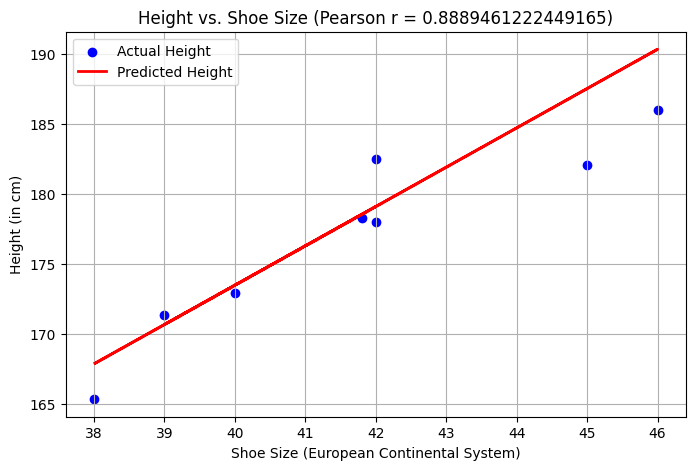

In [353]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test_flat, y_test, color='blue', label='Actual Height')
plt.plot(X_test_flat, y_pred, color='red', linewidth=2, label='Predicted Height')

# Add the Pearson correlation coefficient to the title
plt.title(f'Height vs. Shoe Size (Pearson r = {r_value})')

plt.xlabel('Shoe Size (European Continental System)')
plt.ylabel('Height (in cm)')
plt.legend()
plt.grid(True)
plt.show()



In [358]:
# Select the relevant columns: 'Your height' as target and 'Your mean shoe size' as predictor
X = df[['Your mean shoe size (In the European Continental system)']]  # Predictor (shoe size)
y = df['Height in cm']  # Target (height)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficient (Slope): {model.coef_[0]}")
print(f"Model Intercept: {model.intercept_}")

# You can also print the predicted values alongside actual values
comparison_df = pd.DataFrame({
    'Actual Height': y_test,
    'Predicted Height': y_pred
})
print(comparison_df)


Mean Squared Error: 8.618717694373593
Model Coefficient (Slope): 2.8095063179229722
Model Intercept: 61.08335189042232
    Actual Height  Predicted Height
33     178.000000        179.082617
36     186.000000        190.320643
4      182.016400        187.511136
13     171.319952        170.654098
30     182.499942        179.082617
26     165.320000        167.844592
6      172.897800        173.463605
27     178.231035        178.551089


/var/folders/x9/7trw1hcj47vbr9_c1w7dqnvw0000gn/T/ipykernel_98192/2259049223.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), shade=True)


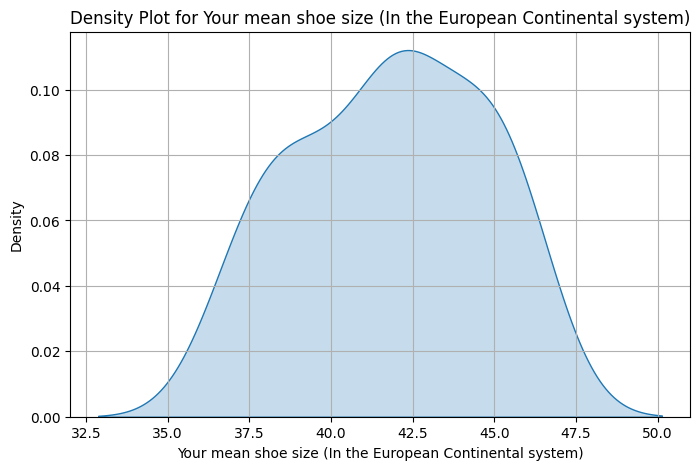

/var/folders/x9/7trw1hcj47vbr9_c1w7dqnvw0000gn/T/ipykernel_98192/2259049223.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), shade=True)


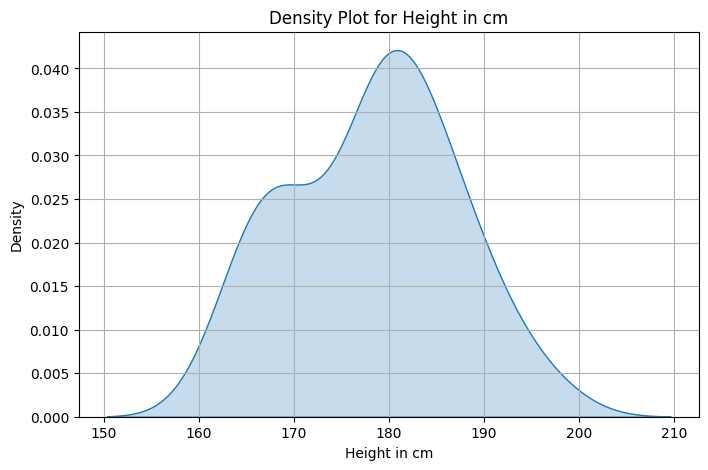

In [ ]:
to_plot = ['Your mean shoe size (In the European Continental system)', 
           'Height in cm']

# Loop over the columns and create KDE plots
for column in to_plot:
    plt.figure(figsize=(8, 5))
    
    # Plot the density (KDE) plot
    sns.kdeplot(df[column].dropna(), shade=True)
    
    # Add titles and labels
    plt.title(f'Density Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    
    # Show the grid
    plt.grid(True)
    
    # Display the plot
    plt.show()

In [323]:
print(f"Pearson correlation coefficient between predicted and actual heights: {r_value:.5f}")
print(f"P-value: {p_value:.5e}")

TypeError: unsupported format string passed to numpy.ndarray.__format__